# This set of codes are designed to provide a vivid step by step exploration of the linear regression. While there are comprehenseive libraries to conduct such estimations, a step by step method will aid in better understanding of how the procedure works. It also is more easily modified if need be.

In [1]:
# import the necessary libraries.

#estimation libraries

import pandas as pd
import numpy as np
import numpy.linalg as linalg
import scipy.stats as stats
from scipy.stats import shapiro

#visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
#entering the data
Input_DATA=pd.read_csv('SampleData.csv')

In [3]:
#checking the dataset
Input_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            29 non-null     int64  
 1   GDP             29 non-null     float64
 2   Capital         29 non-null     float64
 3   Labor           29 non-null     float64
 4   GDP_Normal      29 non-null     float64
 5   Capital_Normal  29 non-null     float64
 6   Labor_Normal    29 non-null     float64
 7   GDP_G           29 non-null     float64
 8   Capital_G       29 non-null     float64
 9   Labor_G         29 non-null     float64
 10  Intercept       29 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 2.6 KB


In [4]:
for col in Input_DATA.columns:
    Input_DATA[col]=Input_DATA[col].astype(float)

In [5]:
#dividing the data into dependant and independant variables.
#dependent variable (Y)
Y=Input_DATA['GDP_G'].to_numpy()
#independent variables (X)
X=Input_DATA[['Capital_G','Labor_G','Intercept']].to_numpy()

# After preparing the data it is time for the estimations. First thing to estimate will be the Beta vector which is (X'X)^-1X'Y

In [6]:
#Estimating the coefficients
Beta=(np.dot(np.dot(linalg.inv(np.dot(X.T,X)),X.T),Y)).T

BETA=pd.DataFrame(Beta,columns=['coef'],index=['Capital_G','Labor_G','intercept'])
BETA

,coef
Capital_G,0.528379
Labor_G,-1.817261
intercept,19.724074


In [7]:
Y_HAT=np.dot(X,Beta)
Y_HAT

array([26.12076534, 26.27831511, 26.26146368, 26.11692588, 25.94790146,
       26.10618082, 26.26307999, 26.23712509, 26.23332672, 26.24198072,
       26.25388925, 26.31608492, 26.39451462, 26.47158502, 26.48929268,
       26.46052397, 26.5214198 , 26.62346788, 26.76709144, 26.74316402,
       26.82543466, 26.87379333, 26.80914696, 26.75997618, 26.79477688,
       26.48398732, 26.58024579, 26.56587969, 26.52026955])

# After the estimations are done, it is time to check the goodness of the fit. I do so by estimating the statistics usually used for testing the goodness of the fit.

In [8]:
#the difference between the estimation and the actual values.
ERROR=Y-Y_HAT
Errors=pd.DataFrame(ERROR,columns=['e'])

In [9]:
#the difference between the estimates and the actual mean.
SE=Y_HAT-np.mean(Y)
Se=pd.DataFrame(SE,columns=['se'])

In [10]:
#the difference between actual values and the actual mean.
STD=Y-np.mean(Y)
StD=pd.DataFrame(STD,columns=['std'])

In [11]:
#the models RSS, ESS, and SS
RSS=(sum((Errors['e'])**2))
ESS=(sum((Se['se'])**2))
SS=(sum((StD['std'])**2))
print(' RSS: ',round(RSS,3),'\n','ESS: ',round(ESS,3),'\n','SS:  ',round(SS,3))

 RSS:  0.48 
 ESS:  1.809 
 SS:   2.289


In [12]:
#estimating the R-squared or adjusted R-squared
R_2=1-RSS/SS
R_2_A=1-(((1-R_2)*(len(Y)-1))/(len(Y)-len(X[0])-1))
print(' R-Squared: ',round(R_2,2),'\n','adjusted R-Squared: ',round(R_2_A,2))

 R-Squared:  0.79 
 adjusted R-Squared:  0.77


In [13]:
#estimating the VC matix
sigma_H=RSS/len(Y)
V_C_Mat=(linalg.inv(np.dot(X.T,X)))*sigma_H
VCE_2=pd.DataFrame(V_C_Mat,columns=['Capital_G','Labor_G','intercept'],index=['Capital_G','Labor_G','intercept'])
VCE_1=pd.DataFrame()
for col in VCE_2.columns:
    VCE_1[col]=(VCE_2[col])**0.5
VCE_1

,Capital_G,Labor_G,intercept
Capital_G,0.073752,0.163759,NaN
Labor_G,0.163759,0.684731,NaN
intercept,NaN,NaN,3.931857


In [14]:
#the main usful outcomes of the model including the t-stat and the p-value for each coefficient

VaR=pd.DataFrame(np.diag(VCE_1),columns=['VaR'],index=['Capital_G','Labor_G','intercept'])

VaR['Beta']=BETA['coef']
VaR['std']=VaR['VaR']**.5
VaR['t-stat']=VaR['Beta']/VaR['std']
VaR['p-value']=stats.t.sf(abs(VaR['t-stat']),df=(len(Y)-len(X[0])-1)).round(3)
VaR[['Beta','std','t-stat','p-value']].round(3)

,Beta,std,t-stat,p-value
Capital_G,0.528,0.272,1.946,0.032
Labor_G,-1.817,0.827,-2.196,0.019
intercept,19.724,1.983,9.947,0.000


Text(0.5, 1.0, 'actual VS fitted')

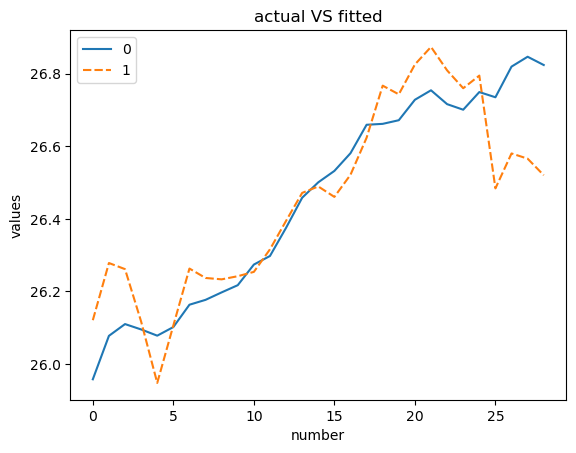

In [15]:
#comparing actual and fitted values
sns.lineplot([Y,Y_HAT])
plt.xlabel('number')
plt.ylabel('values')
plt.title('actual VS fitted')


 Shapiro Stat:  0.898 
 P-Value:       0.009


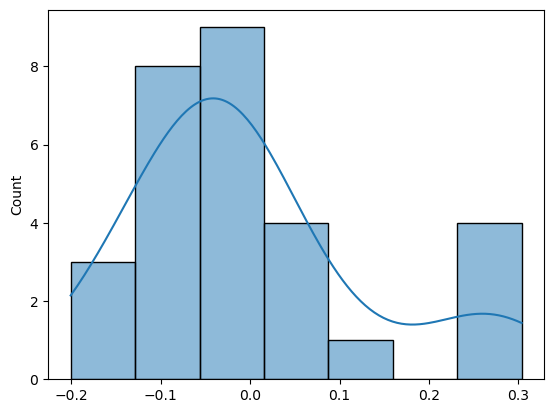

In [16]:
#testing for normality of the errors. 
#H0: the errors are normally distributed
sns.histplot(ERROR,kde=True)
norm_test=shapiro(ERROR)
p_value=norm_test.pvalue
norm_stat=norm_test.statistic
print(' Shapiro Stat: ',round(norm_stat,3),'\n','P-Value:      ',round(p_value,3))

In [17]:
#testing the significance of the regression as a whole.
#H0: all coefficients are equal to zero.
F_Stat=(ESS/(len(X[0])-1))/(RSS/(len(Y)-len(X[0])))
p = 2.0*(1.0 - stats.f.cdf(F_Stat, (len(X[0])-1), (len(Y)-len(X[0])-1)))
print(' F_Stat: ',round(F_Stat,3),'\n','p_value: ',round(p,3))

 F_Stat:  49.051 
 p_value:  0.0
